# Day 2 
[![Author - DanRamirez](https://img.shields.io/badge/Author-DanRamirez-2ea44f?style=for-the-badge)](https://github.com/Dandata0101)
![Python - Version](https://img.shields.io/badge/PYTHON-3.11-red?style=for-the-badge&logo=python&logoColor=white)
[![Project Repo](https://img.shields.io/badge/Our_Project_Repo-Visit-blue?style=for-the-badge&logo=github&logoColor=white)](https://github.com/Dandata0101/mbs-fraud-detection)



##  flattening file sizes

In [47]:
# select at least 3 variables for this analysis

import os
import sys
from scripts.csvtopaquet import csv_to_parquet_single_file

current_directory = os.getcwd()
csv1_file_path = os.path.join(current_directory, '01-data', 'FD_02_apl_test.csv')
csv2_file_path = os.path.join(current_directory, '01-data', 'FD_02_apl_train.csv')
csv3_file_path = os.path.join(current_directory, '01-data', 'FD_02_previos_appl.csv')
csv4_file_path = os.path.join(current_directory, '01-data', 'FD_05_fraud_small_datset.csv')

output_file_path1 = os.path.join(current_directory, '01-data', 'FD_02_apl_test.parquet')
output_file_path2 = os.path.join(current_directory, '01-data', 'FD_02_apl_train.parquet')
output_file_path3 = os.path.join(current_directory, '01-data', 'FD_02_previos_appl.parquet')
output_file_path4 = os.path.join(current_directory, '01-data', 'FD_05_fraud_small_datset.parquet')


csv_to_parquet_single_file(csv_file_path=csv1_file_path, output_file_path=output_file_path1, chunksize=100000, sample_rows=None, drop_columns=None)
csv_to_parquet_single_file(csv_file_path=csv2_file_path, output_file_path=output_file_path2, chunksize=100000, sample_rows=None, drop_columns=None)
csv_to_parquet_single_file(csv_file_path=csv3_file_path, output_file_path=output_file_path3, chunksize=100000, sample_rows=None, drop_columns=None)
csv_to_parquet_single_file(csv_file_path=csv4_file_path, output_file_path=output_file_path4, chunksize=100000, sample_rows=None, drop_columns=None)

Row count before sampling: 48744
Row count after sampling: 48744
Conversion completed. The data has been saved to '/Users/danramirez/mbs-fraud-detection/01-data/FD_02_apl_test.parquet'.
Row count before sampling: 307511
Row count after sampling: 307511
Conversion completed. The data has been saved to '/Users/danramirez/mbs-fraud-detection/01-data/FD_02_apl_train.parquet'.
Row count before sampling: 1670214
Row count after sampling: 1670214
Conversion completed. The data has been saved to '/Users/danramirez/mbs-fraud-detection/01-data/FD_02_previos_appl.parquet'.
Row count before sampling: 555719
Row count after sampling: 555719
Conversion completed. The data has been saved to '/Users/danramirez/mbs-fraud-detection/01-data/FD_05_fraud_small_datset.parquet'.


In [48]:
import pandas as pd
import numpy as np
import sys,os

current_directory = os.getcwd()
parquetFile1 = os.path.join(current_directory, '01-data', 'FD_02_apl_test.parquet')
parquetFile2 = os.path.join(current_directory, '01-data', 'FD_02_apl_train.parquet')
parquetFile3 = os.path.join(current_directory, '01-data', 'FD_02_previos_appl.parquet')

df1 = pd.read_parquet(parquetFile1)
df2 = pd.read_parquet(parquetFile2)
df3 = pd.read_parquet(parquetFile3)


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np

# Load the datasets
train = df1
test  = df2
current_data = pd.concat([train, test], axis=0)
previous_data = df3
current_data = current_data.fillna(0)
#current_data.drop('SK_ID_CURR', axis=1, inplace=True)

previous_data = previous_data.fillna(0)

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 and df2 are previously defined DataFrames for training and test sets, respectively
# Similarly assuming df3 is another DataFrame you're working with

# Concatenate train and test DataFrames for current data
current_data = pd.concat([df1, df2], axis=0).fillna(0)

# Assuming previous_data is another DataFrame you've prepared and filled missing values with 0
previous_data = df3.fillna(0)

# Save the current concatenated and cleaned DataFrame to CSV
current_data.to_csv('QA.csv')

# Basic data inspection
print('Basic data inspection')
print(current_data.head())
print(current_data.info())
print(current_data.dtypes)
print(current_data.columns.tolist())
print('')
print(current_data.DAYS_EMPLOYED.describe())
print('')
print(current_data.DAYS_EMPLOYED.abs().describe())

# Plotting
plt.figure(figsize=(30, 12))

# Horizontal Bar Chart for 'TARGET' value counts
plt.subplot(1, 2, 1)
target_counts = current_data['TARGET'].value_counts()
target_counts.plot(kind='barh', color=['#9e7edf', '#FFD700'])
for index, value in enumerate(target_counts):
    plt.text(value, index, f"{value}", va='center')  # Annotate with actual counts

plt.subplot(1, 2, 2)
# Directly use the color argument within plot method, removed the 'colors' parameter which was incorrect
# Adding manual text annotations for counts
ax = current_data['TARGET'].value_counts().plot(kind='pie', color=['#9e7edf', '#FFD700'])
for i, value in enumerate(current_data["TARGET"].value_counts()):
    ax.text(value, i, str(value), va='center')

plt.title('TARGET Variable Distribution')
plt.tight_layout()  # Adjust layout to not overlap subplots
plt.show()


Basic data inspection
   SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_19 FLAG_DOCUMENT_20

/var/folders/ft/dwmcjbnd0b35z5n9yksp4jfh0000gn/T/ipykernel_8850/2008847518.py:62: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to not overlap subplots


ValueError: Image size of 122498448x990 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 3000x1200 with 2 Axes>

In [50]:

# Analyze object and numeric columns separately
data_obj_cols = current_data.select_dtypes(include='object')
data_numeric_cols = current_data.select_dtypes(include=['int64', 'float64'])
current_data.columns
columns_data=current_data.columns.values.tolist()
print('number of object cols:',len(data_obj_cols))
print('number of numerics cols:',len(data_numeric_cols))

print(current_data['TARGET'].dtype)
print(current_data['TARGET'].count)

number of object cols: 356255
number of numerics cols: 356255
float64
<bound method Series.count of 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    0.0
307509    1.0
307510    0.0
Name: TARGET, Length: 356255, dtype: float64>


(1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   NAME_CONTRACT_TYPE           1670214 non-null  object 
 2   AMT_ANNUITY                  1297979 non-null  float64
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670213 non-null  float64
 5   AMT_DOWN_PAYMENT             774370 non-null   float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  RATE_DOWN_PAYMENT            774370 non-null   float64
 12  RATE_INTEREST_PRIMARY       

/var/folders/ft/dwmcjbnd0b35z5n9yksp4jfh0000gn/T/ipykernel_8850/818862759.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_counts.values, y=overall_counts.index, palette='Set3')


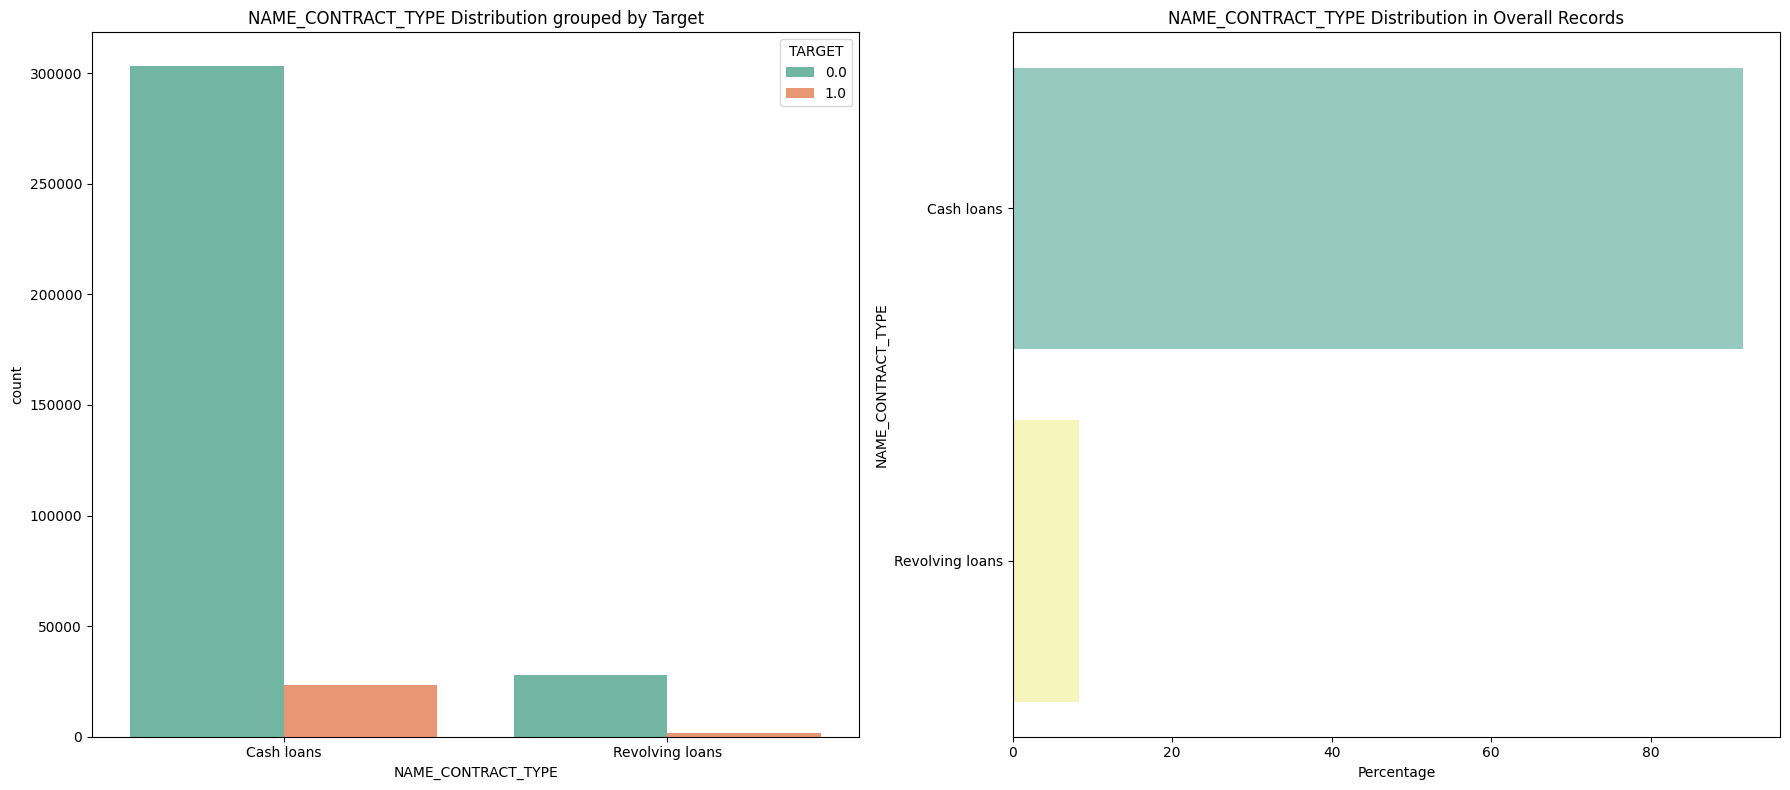

Distribution Based on CODE_GENDER
Description :  Column description placeholder.


/var/folders/ft/dwmcjbnd0b35z5n9yksp4jfh0000gn/T/ipykernel_8850/818862759.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_counts.values, y=overall_counts.index, palette='Set3')


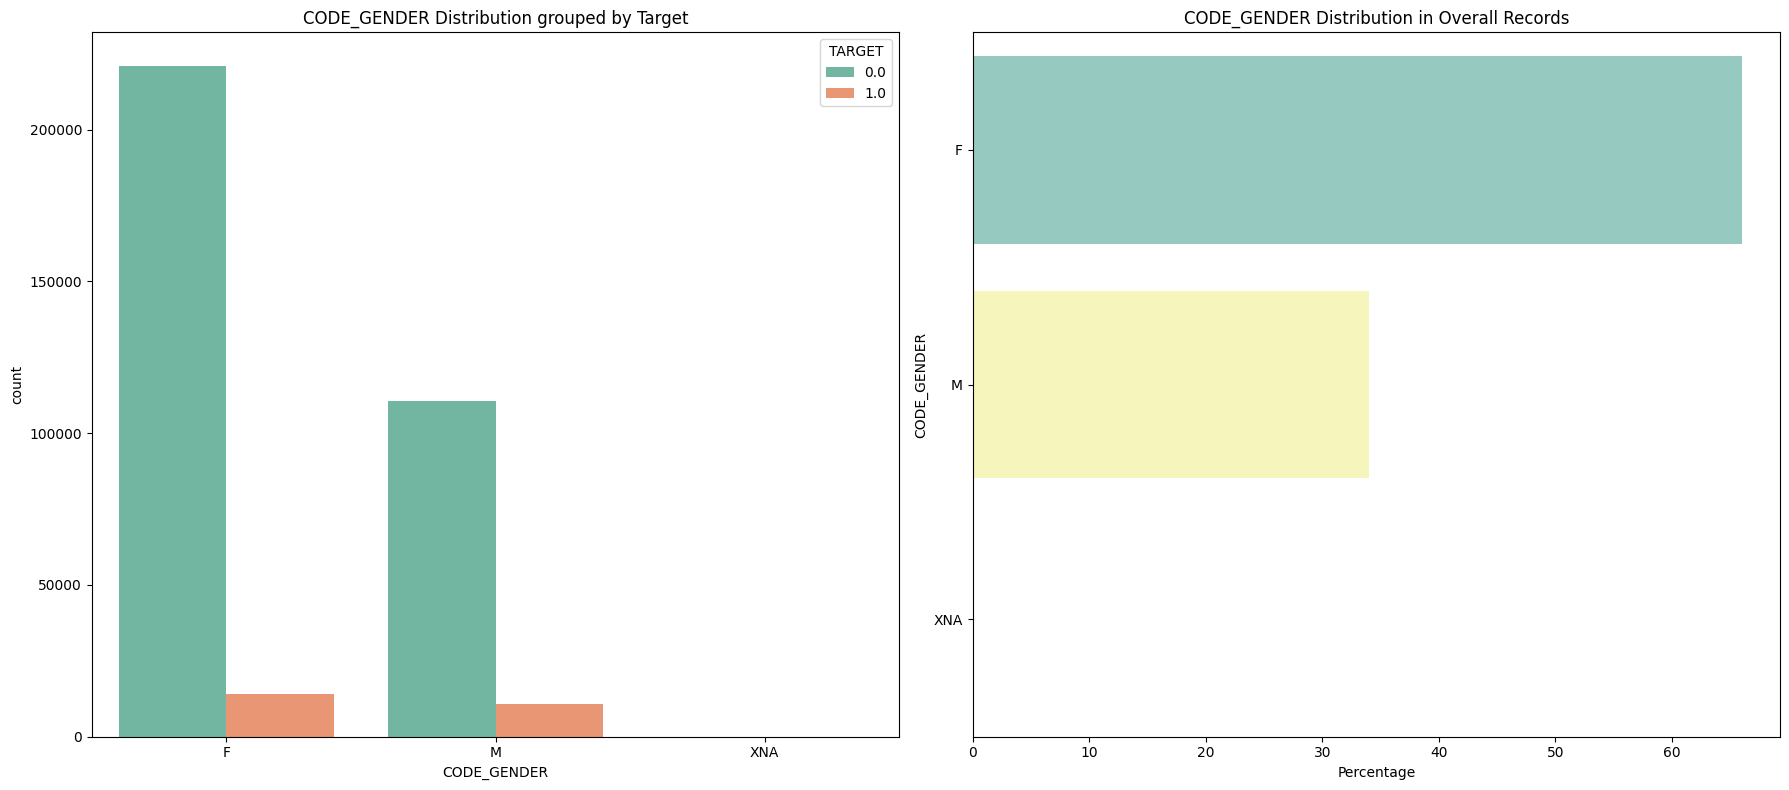

Distribution Based on FLAG_OWN_CAR
Description :  Column description placeholder.


/var/folders/ft/dwmcjbnd0b35z5n9yksp4jfh0000gn/T/ipykernel_8850/818862759.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_counts.values, y=overall_counts.index, palette='Set3')


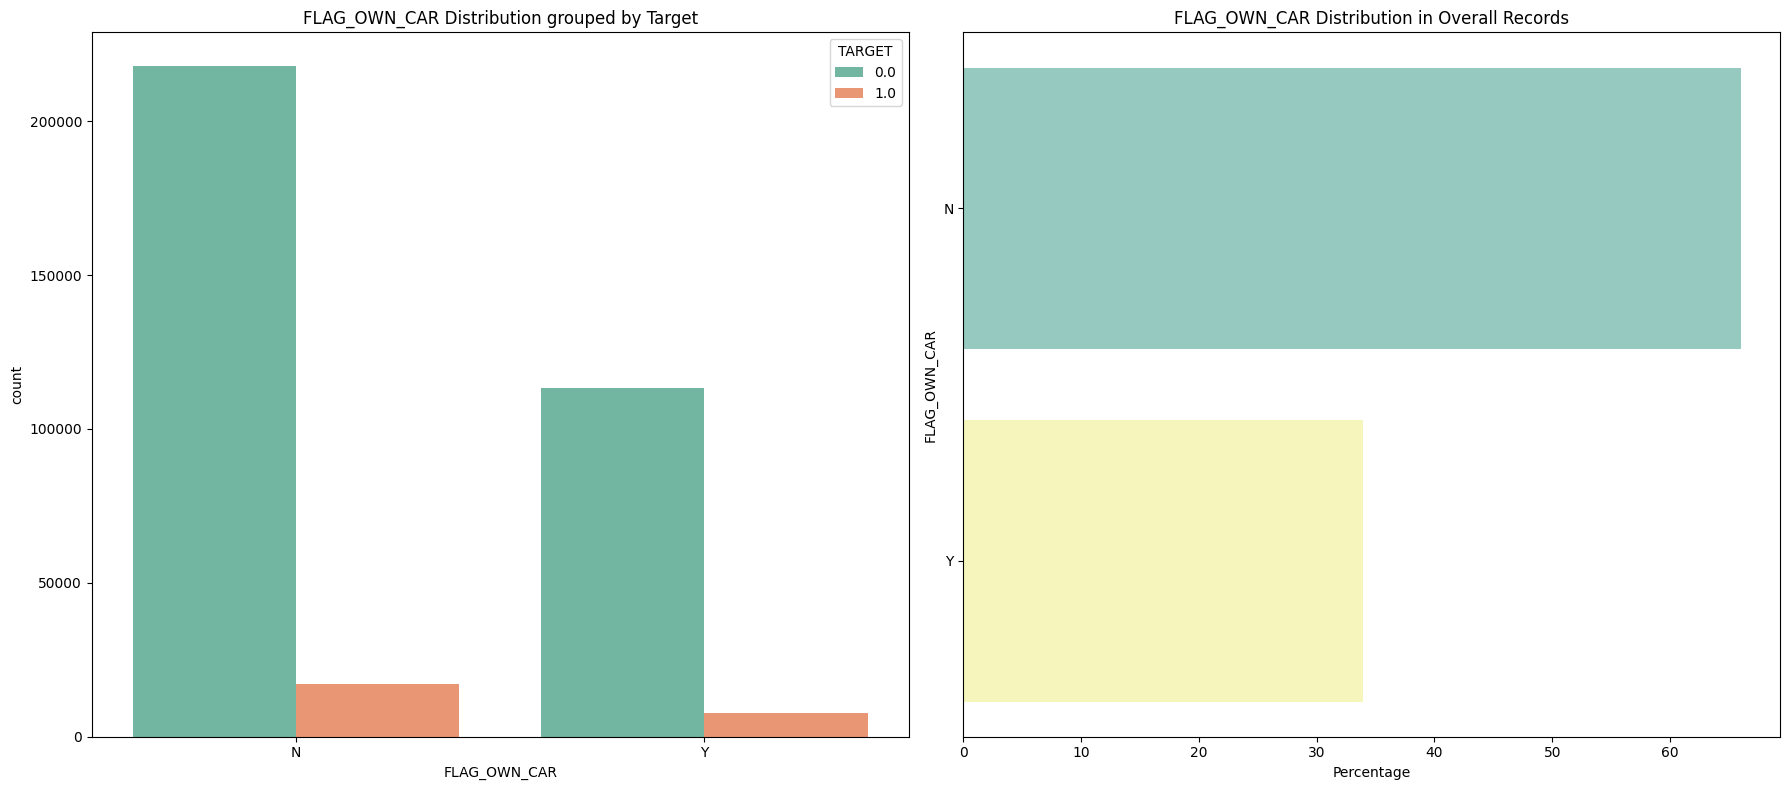

Distribution Based on FLAG_OWN_REALTY
Description :  Column description placeholder.


/var/folders/ft/dwmcjbnd0b35z5n9yksp4jfh0000gn/T/ipykernel_8850/818862759.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_counts.values, y=overall_counts.index, palette='Set3')


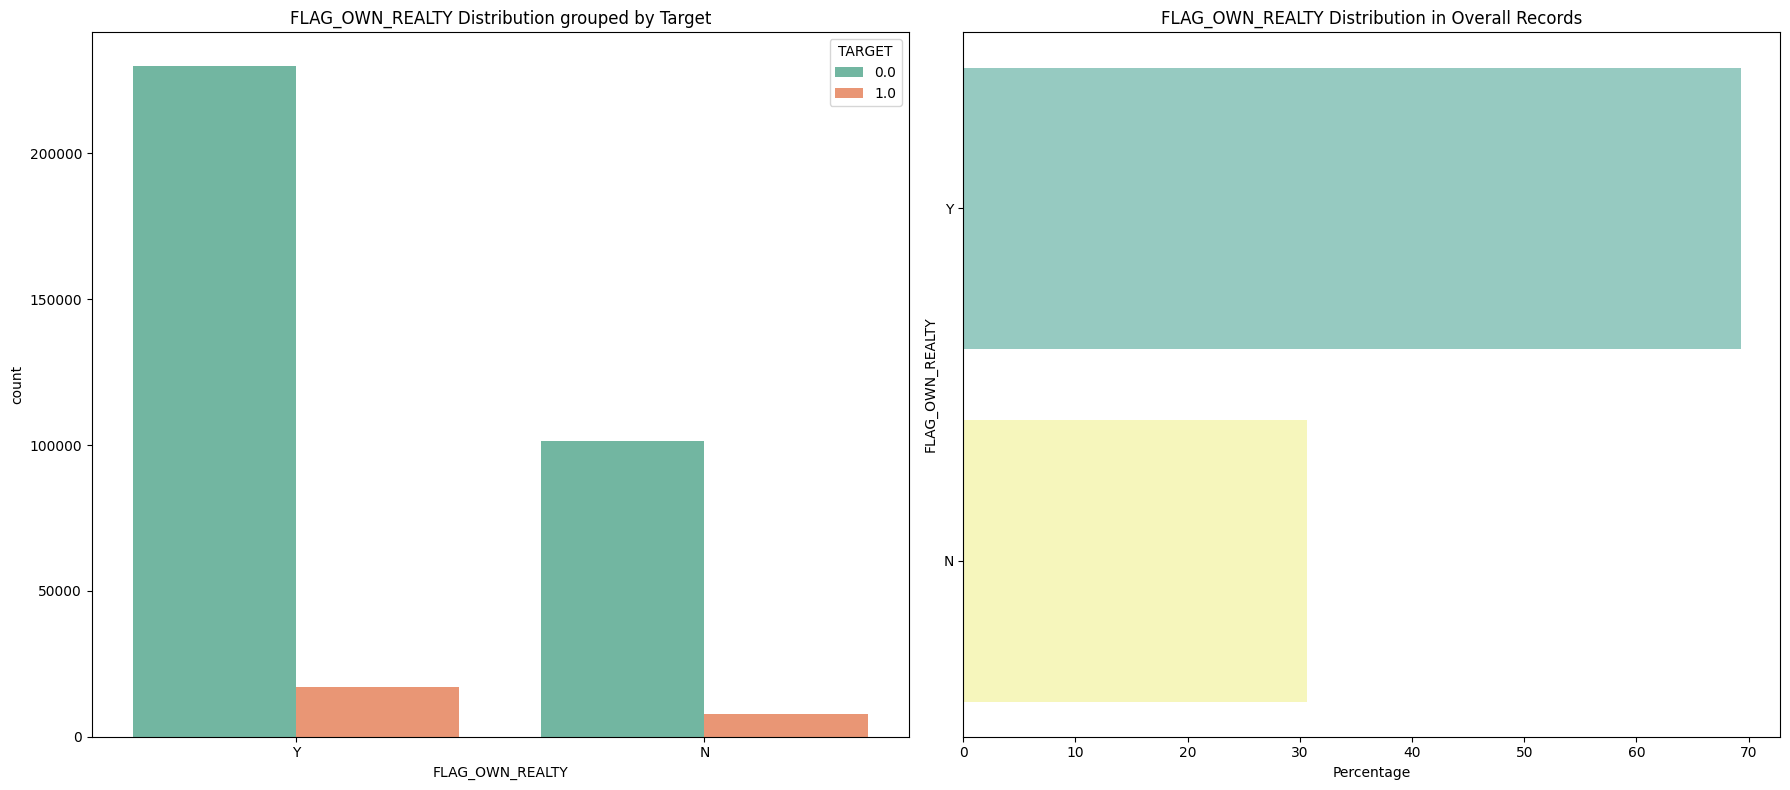

Distribution Based on NAME_TYPE_SUITE
Description :  Column description placeholder.


/var/folders/ft/dwmcjbnd0b35z5n9yksp4jfh0000gn/T/ipykernel_8850/818862759.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_counts.values, y=overall_counts.index, palette='Set3')


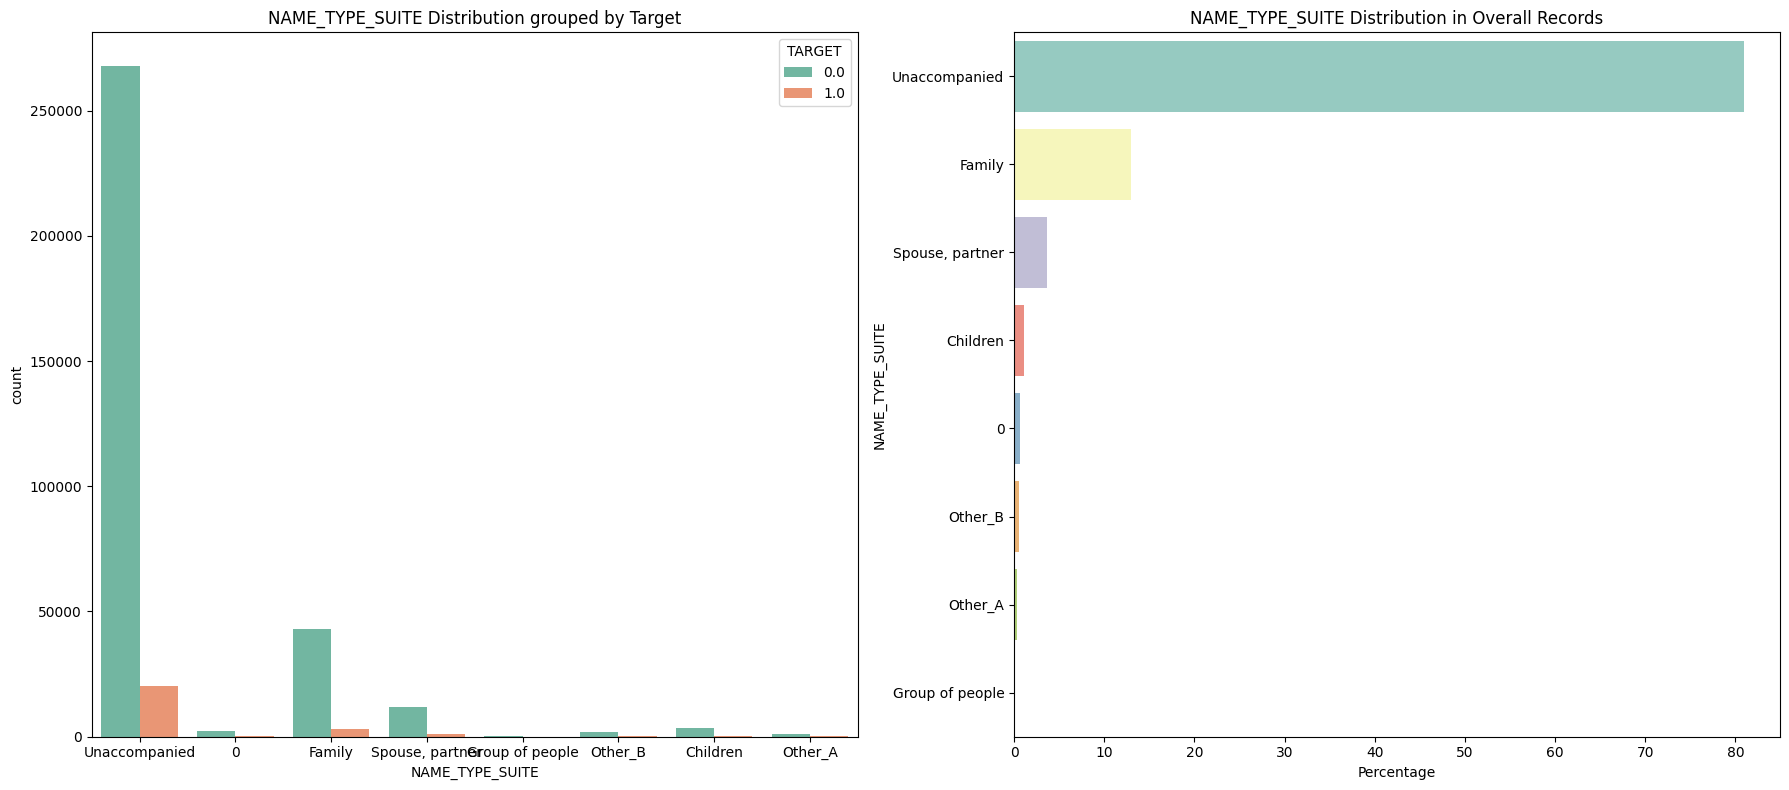

Distribution Based on NAME_INCOME_TYPE
Description :  Column description placeholder.


/var/folders/ft/dwmcjbnd0b35z5n9yksp4jfh0000gn/T/ipykernel_8850/818862759.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_counts.values, y=overall_counts.index, palette='Set3')


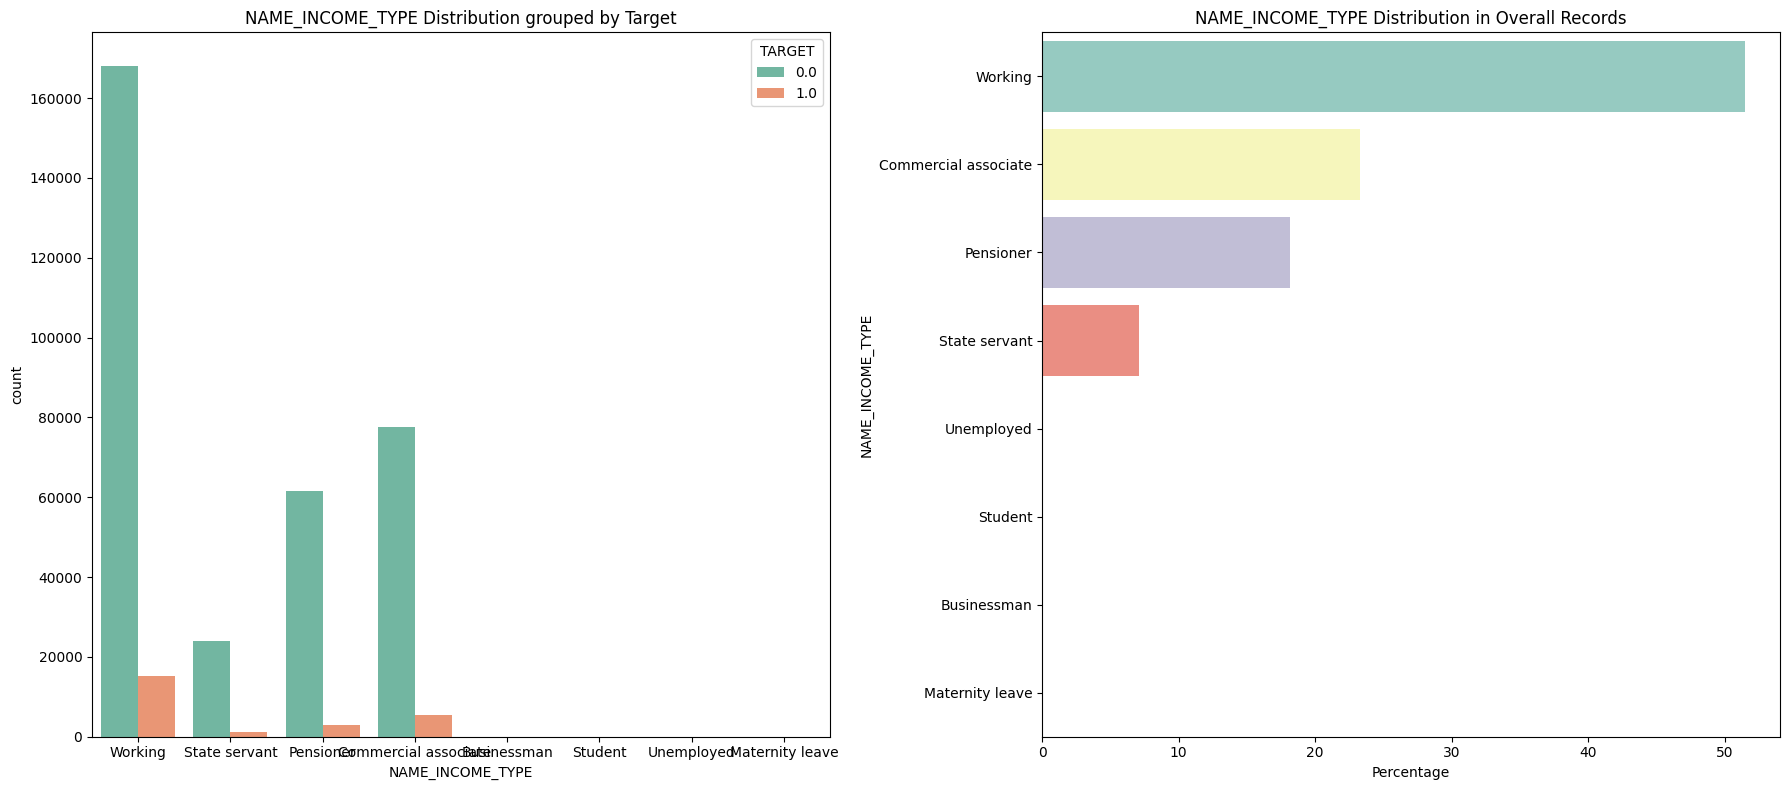

Distribution Based on NAME_EDUCATION_TYPE
Description :  Column description placeholder.


/var/folders/ft/dwmcjbnd0b35z5n9yksp4jfh0000gn/T/ipykernel_8850/818862759.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_counts.values, y=overall_counts.index, palette='Set3')


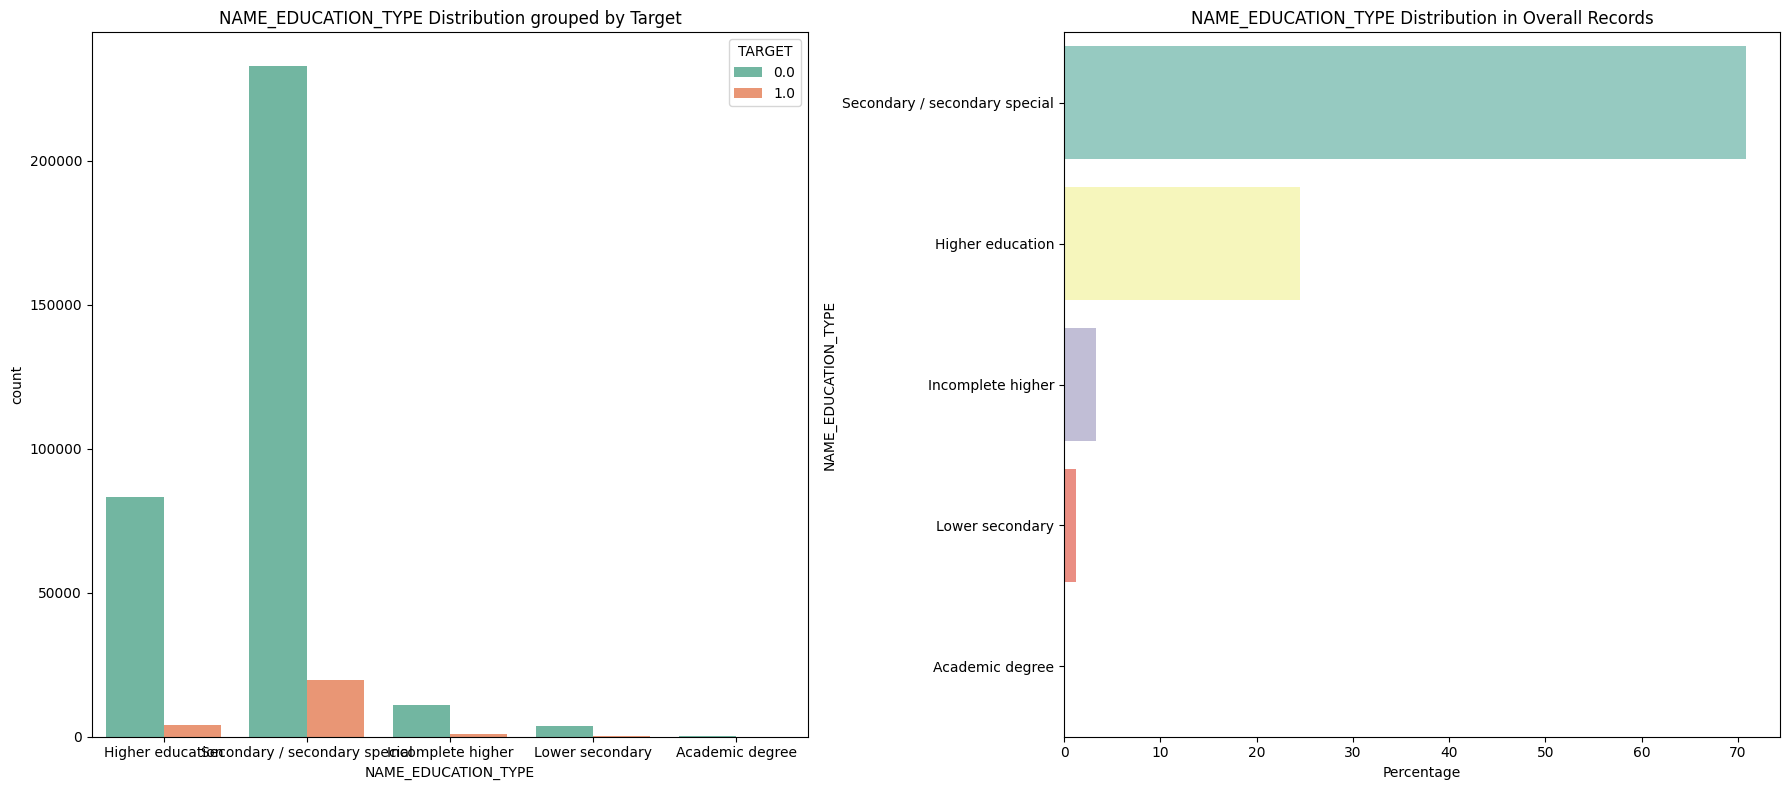

Distribution Based on NAME_FAMILY_STATUS
Description :  Column description placeholder.


/var/folders/ft/dwmcjbnd0b35z5n9yksp4jfh0000gn/T/ipykernel_8850/818862759.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_counts.values, y=overall_counts.index, palette='Set3')


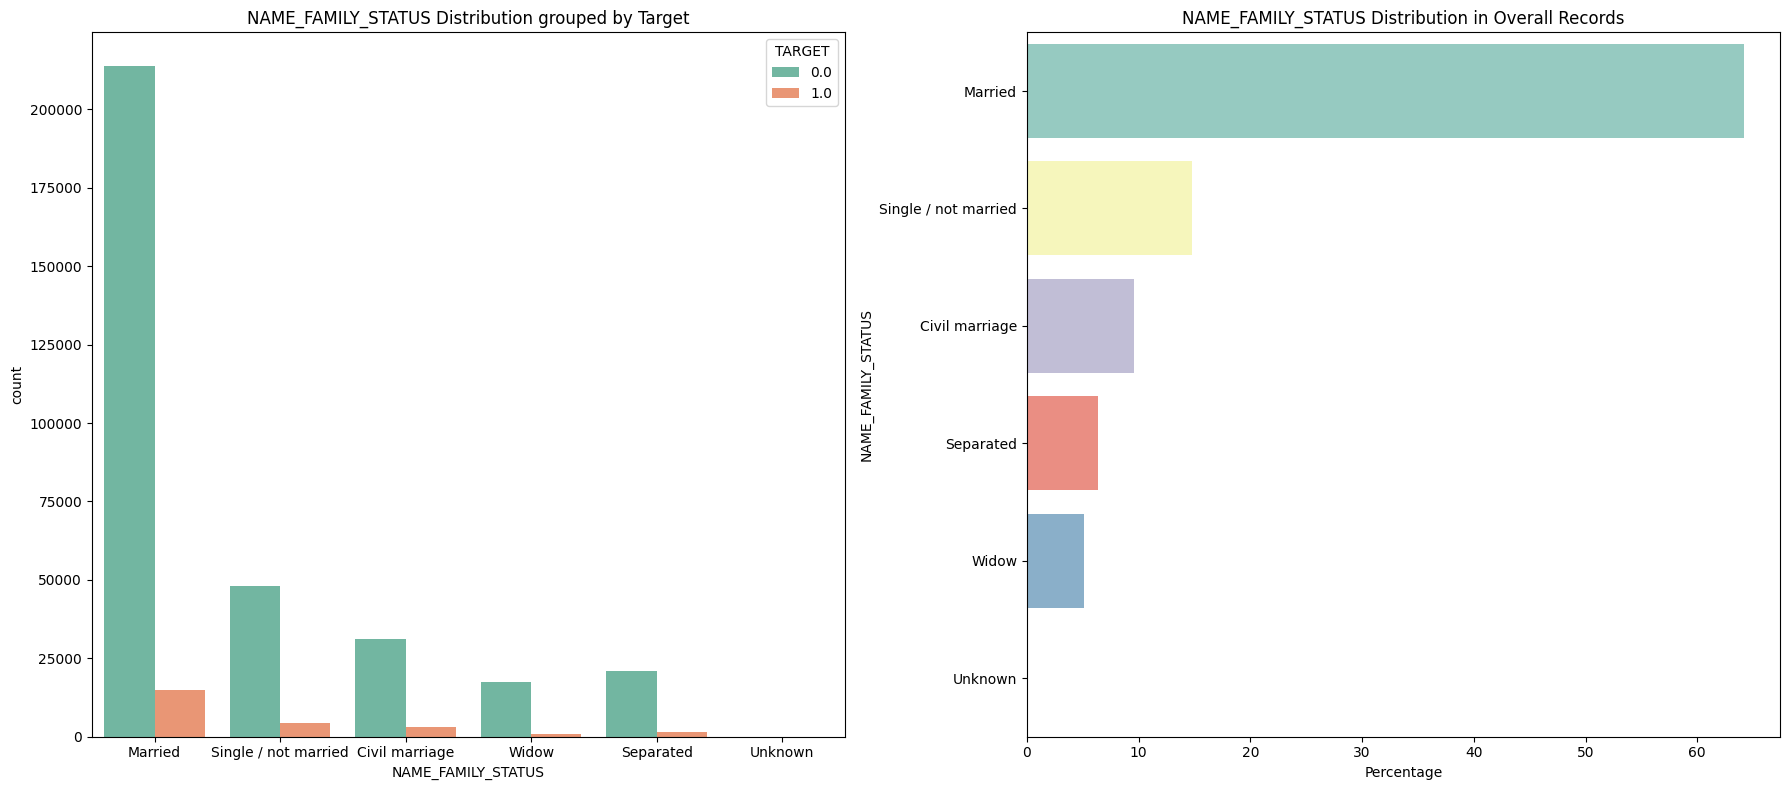

Distribution Based on NAME_HOUSING_TYPE
Description :  Column description placeholder.


/var/folders/ft/dwmcjbnd0b35z5n9yksp4jfh0000gn/T/ipykernel_8850/818862759.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_counts.values, y=overall_counts.index, palette='Set3')


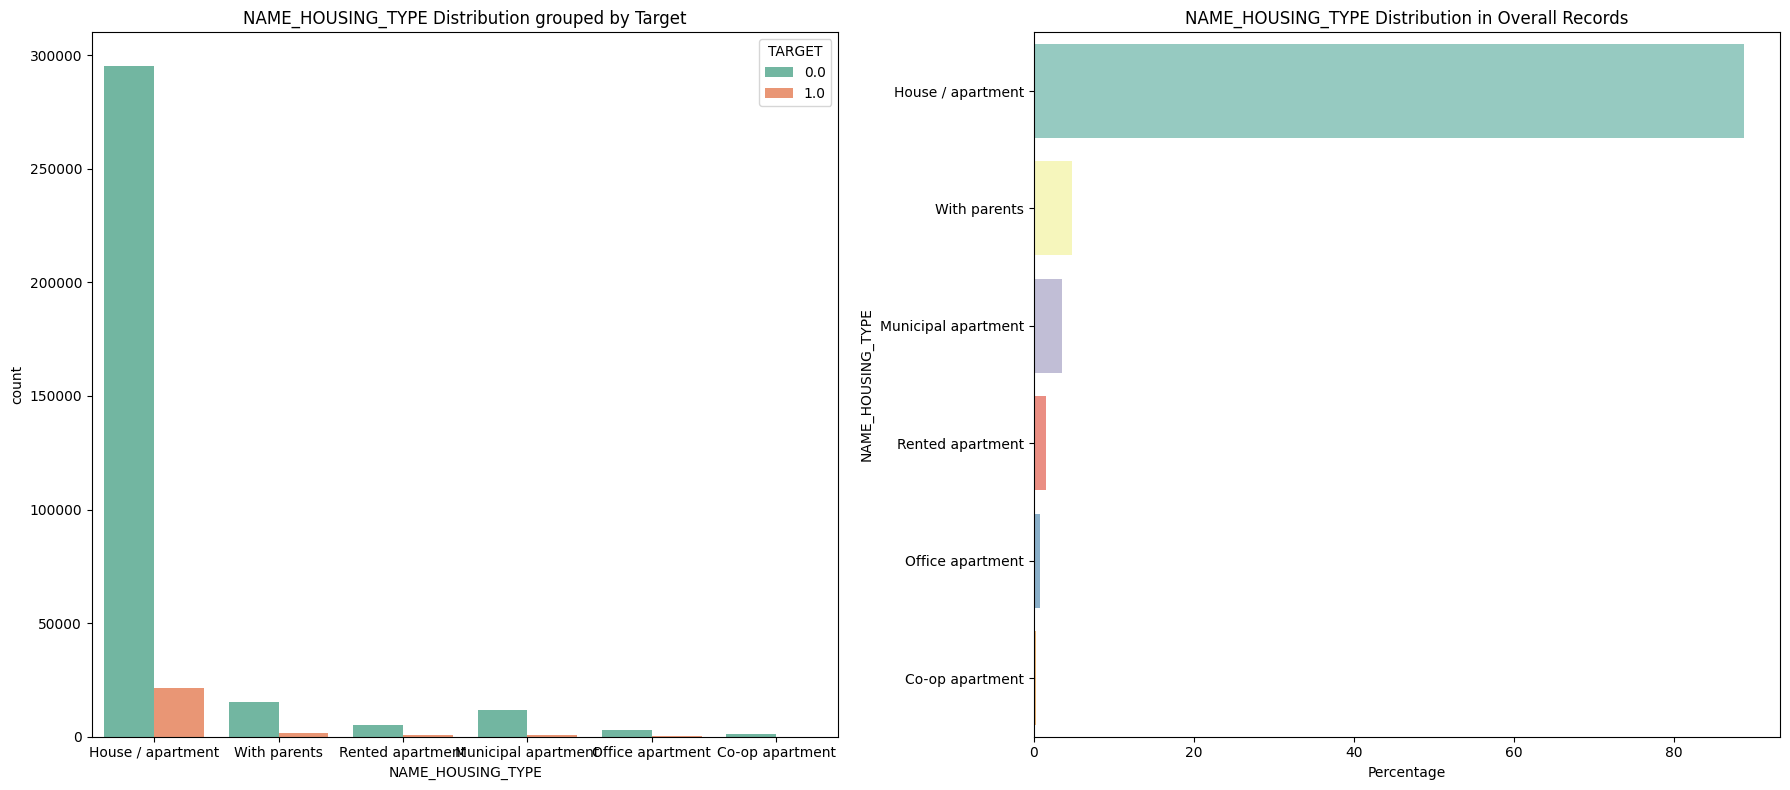

Distribution Based on OCCUPATION_TYPE
Description :  Column description placeholder.


/var/folders/ft/dwmcjbnd0b35z5n9yksp4jfh0000gn/T/ipykernel_8850/818862759.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_counts.values, y=overall_counts.index, palette='Set3')


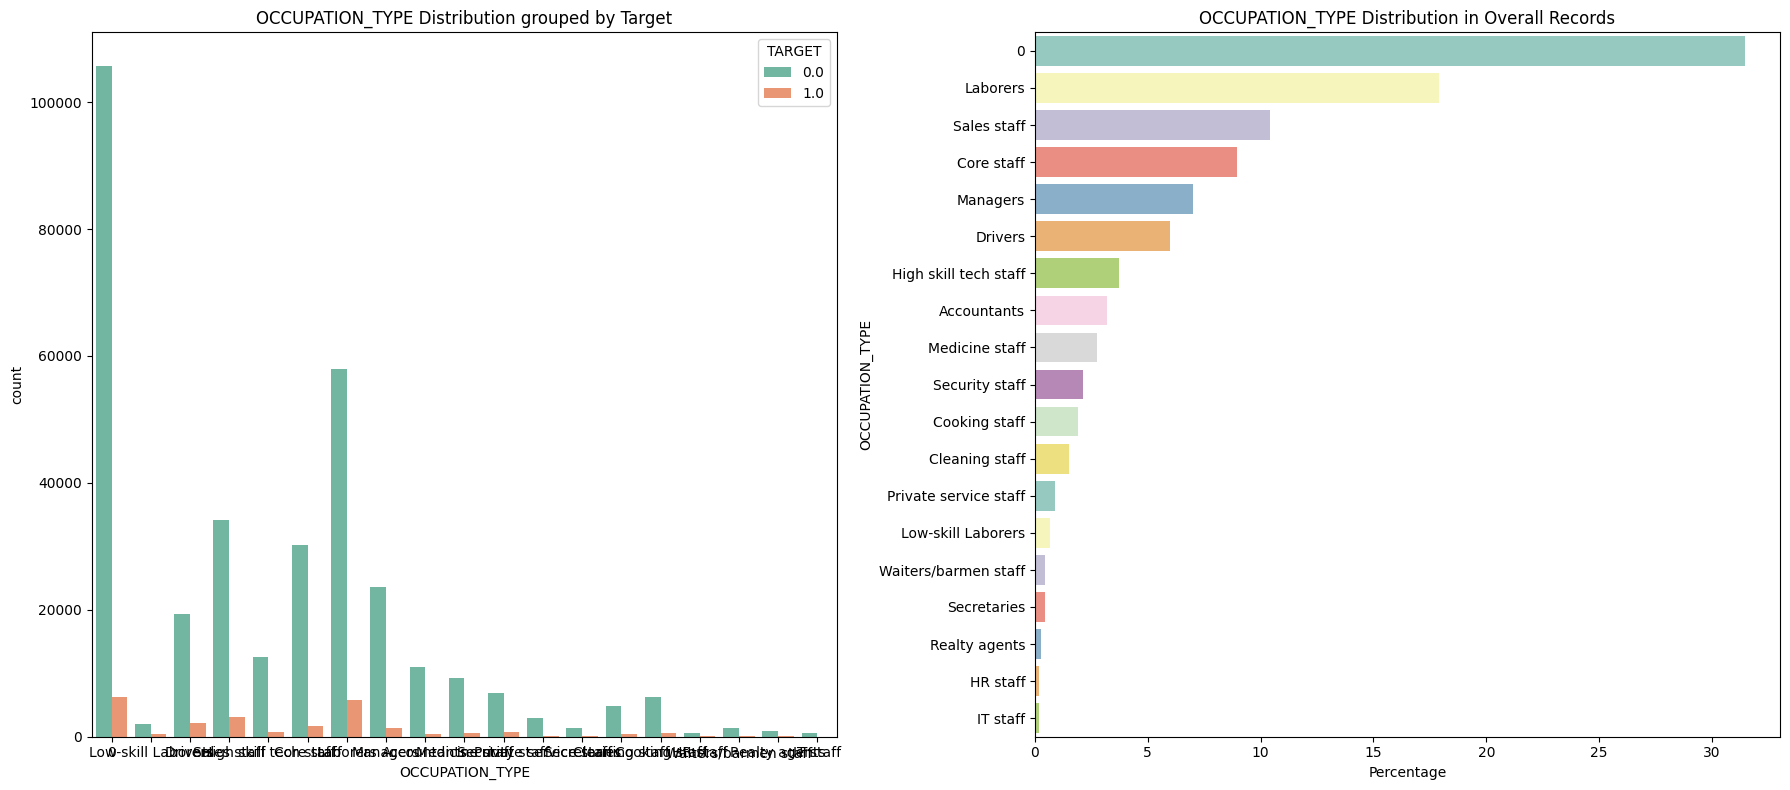

Distribution Based on WEEKDAY_APPR_PROCESS_START
Description :  Column description placeholder.


/var/folders/ft/dwmcjbnd0b35z5n9yksp4jfh0000gn/T/ipykernel_8850/818862759.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_counts.values, y=overall_counts.index, palette='Set3')


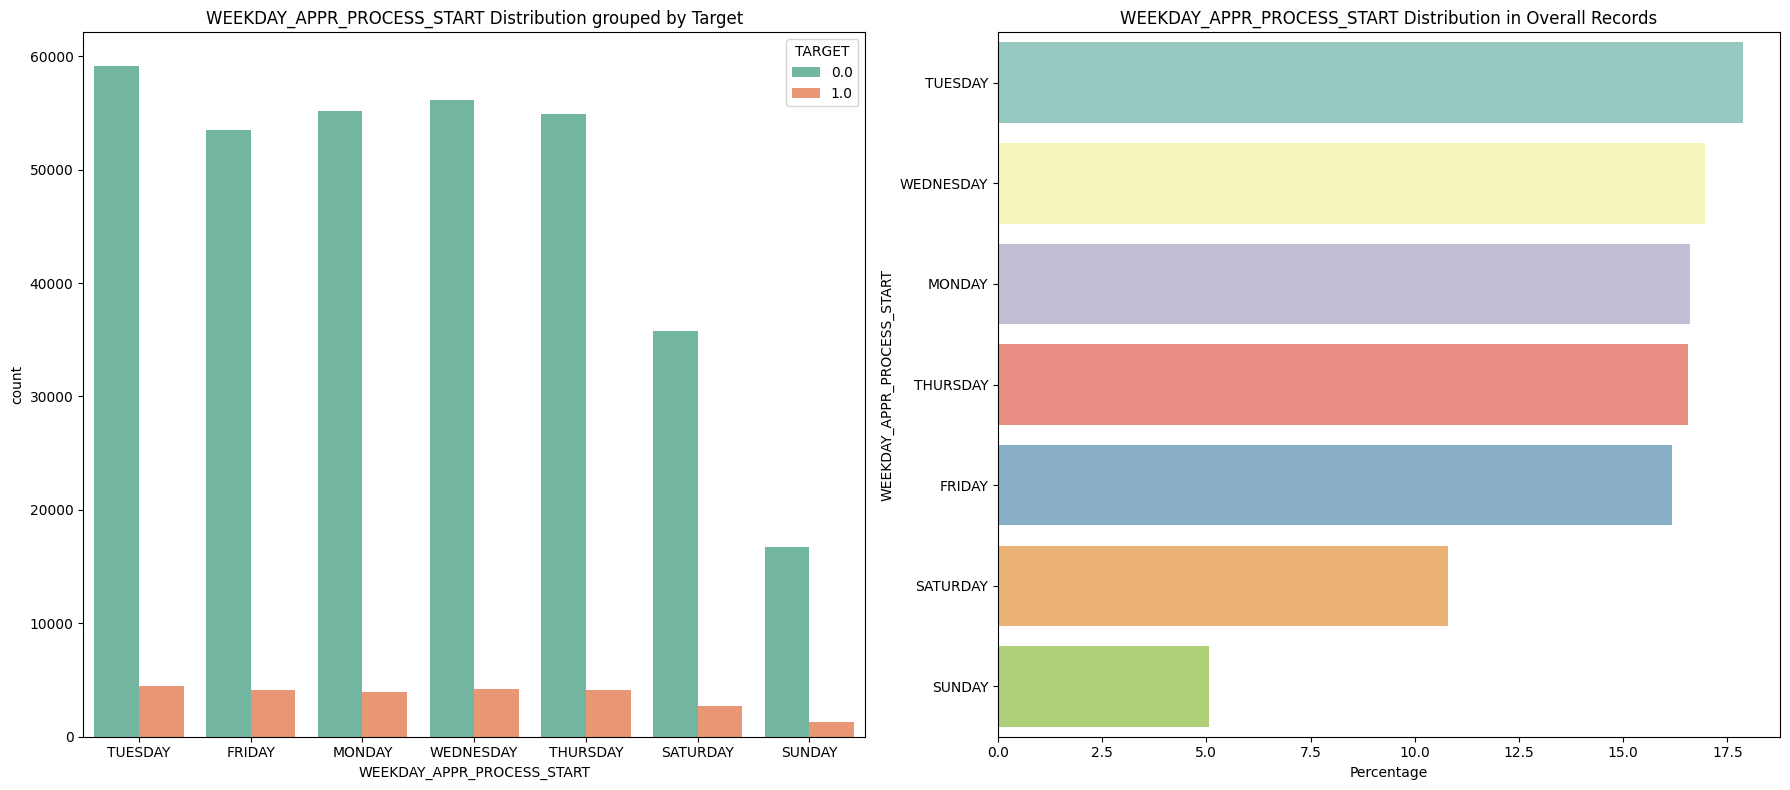

Distribution Based on ORGANIZATION_TYPE
Description :  Column description placeholder.


/var/folders/ft/dwmcjbnd0b35z5n9yksp4jfh0000gn/T/ipykernel_8850/818862759.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_counts.values, y=overall_counts.index, palette='Set3')


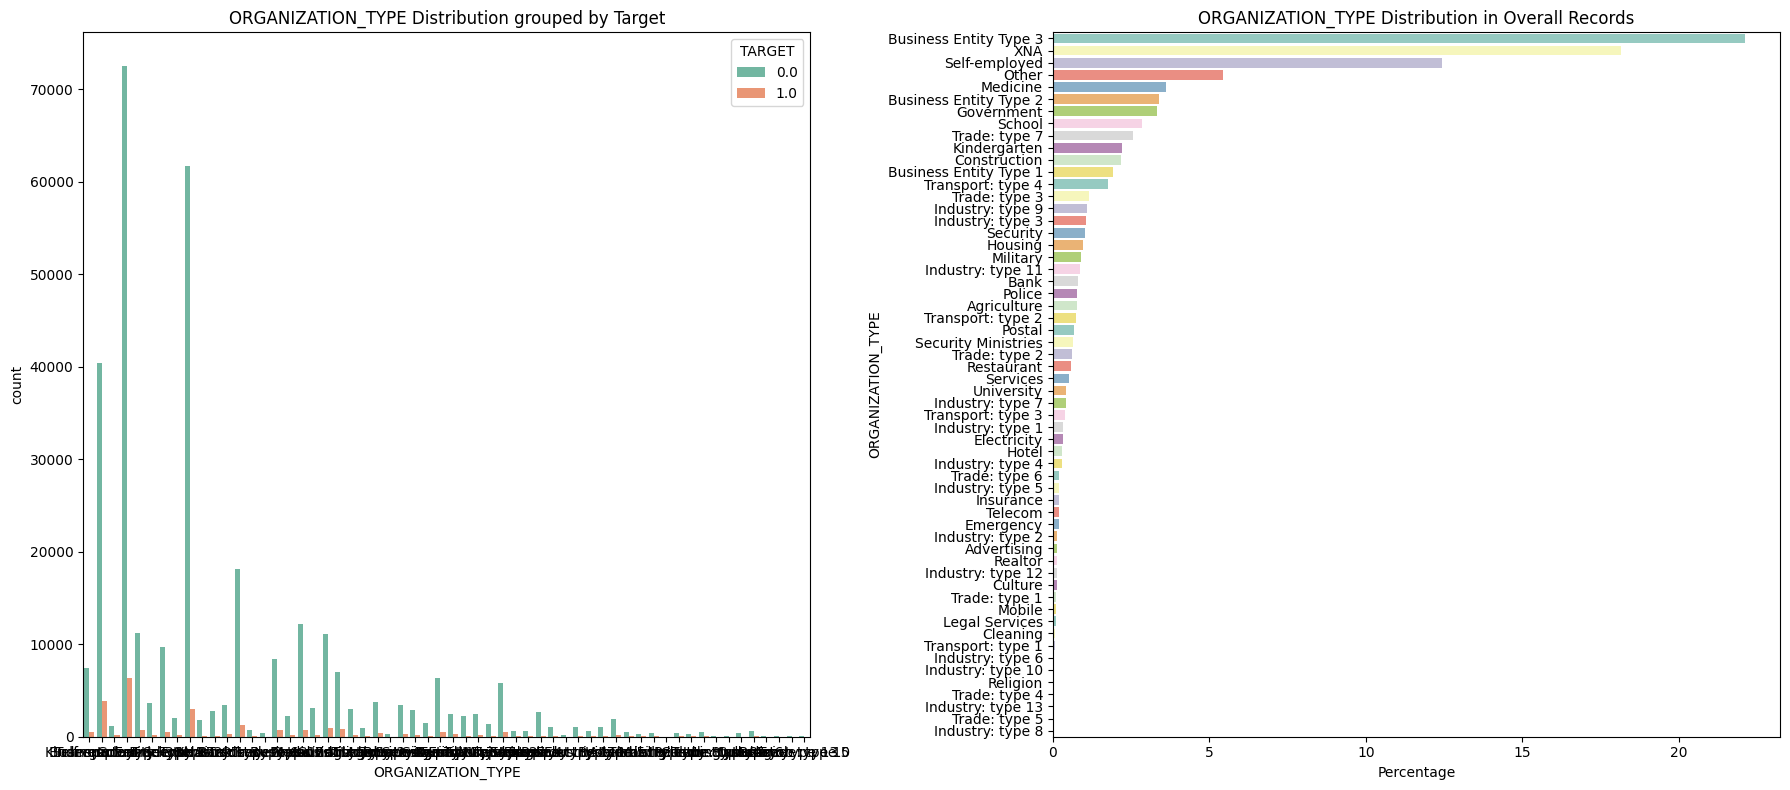

Distribution Based on FONDKAPREMONT_MODE
Description :  Column description placeholder.


/var/folders/ft/dwmcjbnd0b35z5n9yksp4jfh0000gn/T/ipykernel_8850/818862759.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_counts.values, y=overall_counts.index, palette='Set3')


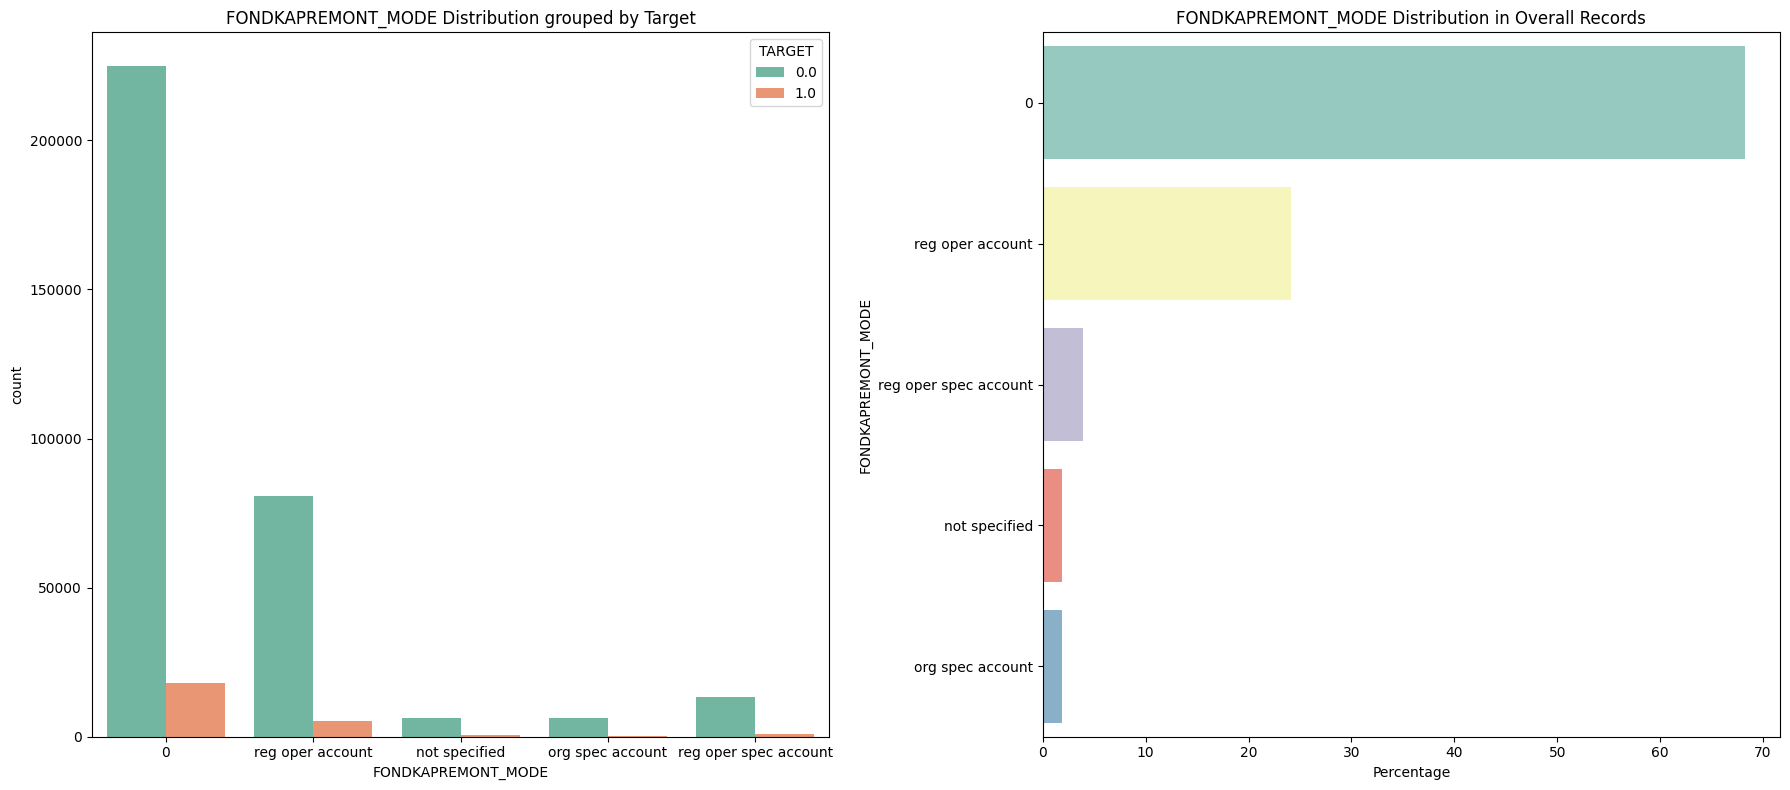

Distribution Based on HOUSETYPE_MODE
Description :  Column description placeholder.


/var/folders/ft/dwmcjbnd0b35z5n9yksp4jfh0000gn/T/ipykernel_8850/818862759.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_counts.values, y=overall_counts.index, palette='Set3')


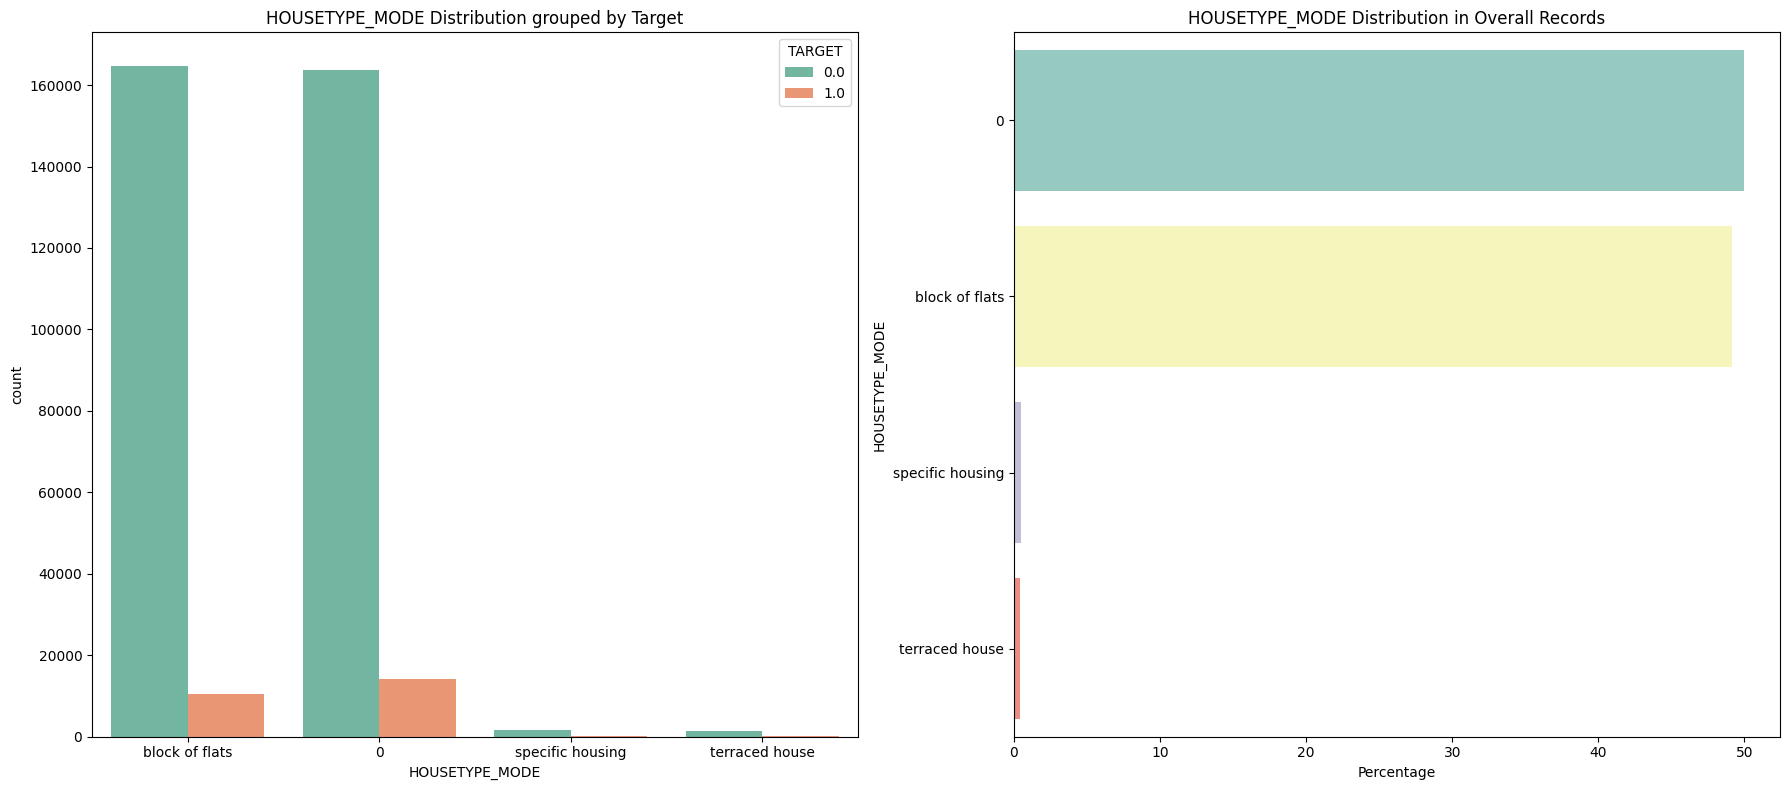

Distribution Based on WALLSMATERIAL_MODE
Description :  Column description placeholder.


/var/folders/ft/dwmcjbnd0b35z5n9yksp4jfh0000gn/T/ipykernel_8850/818862759.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_counts.values, y=overall_counts.index, palette='Set3')


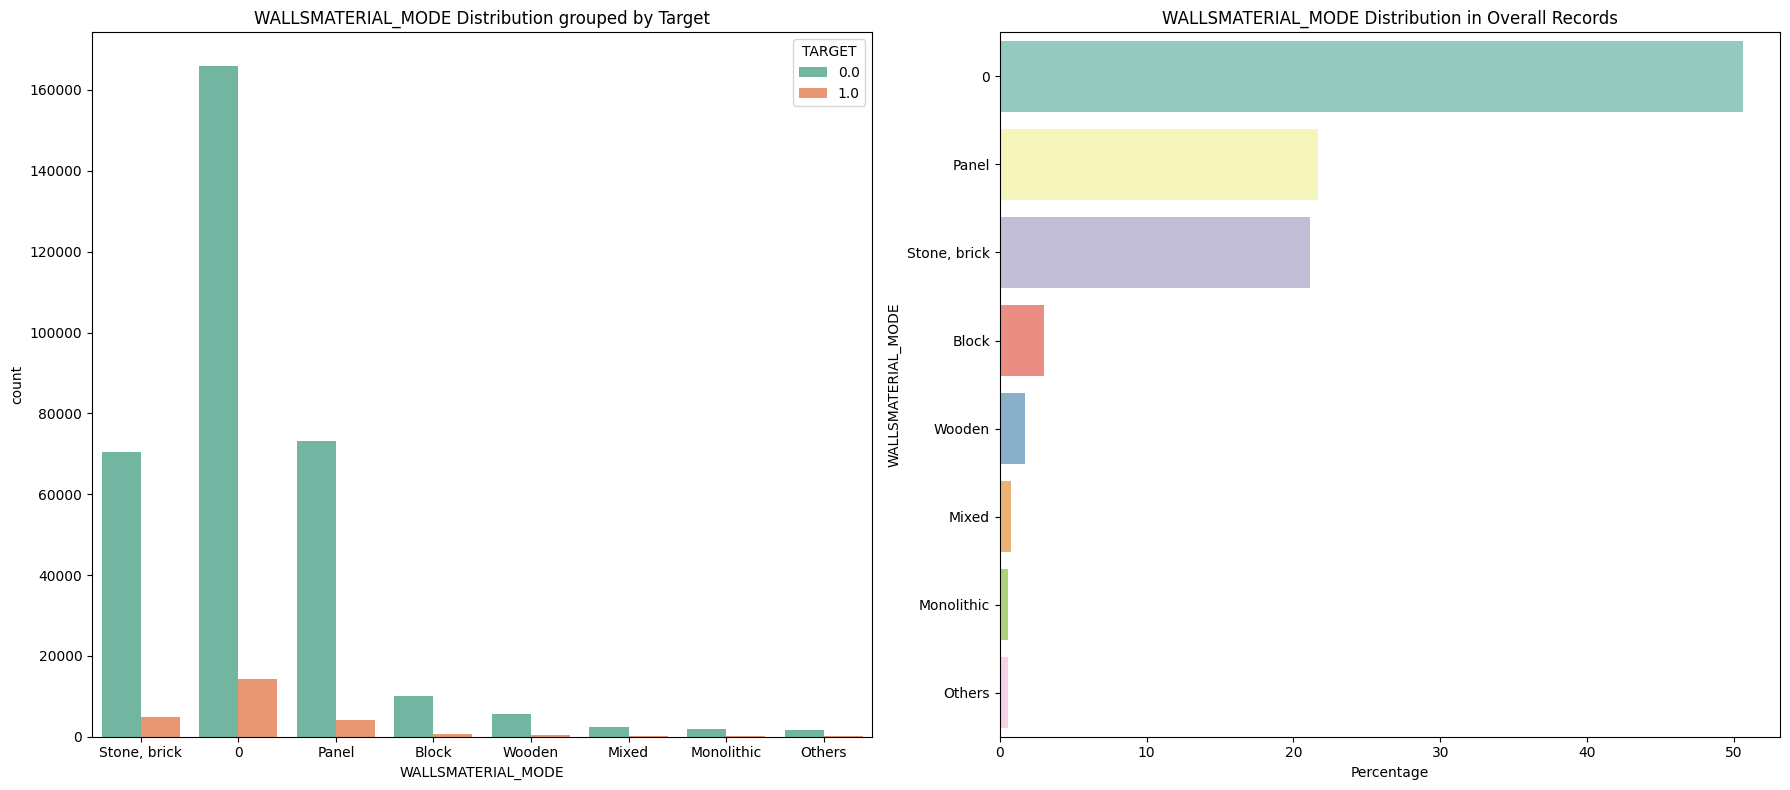

Distribution Based on EMERGENCYSTATE_MODE
Description :  Column description placeholder.


/var/folders/ft/dwmcjbnd0b35z5n9yksp4jfh0000gn/T/ipykernel_8850/818862759.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_counts.values, y=overall_counts.index, palette='Set3')


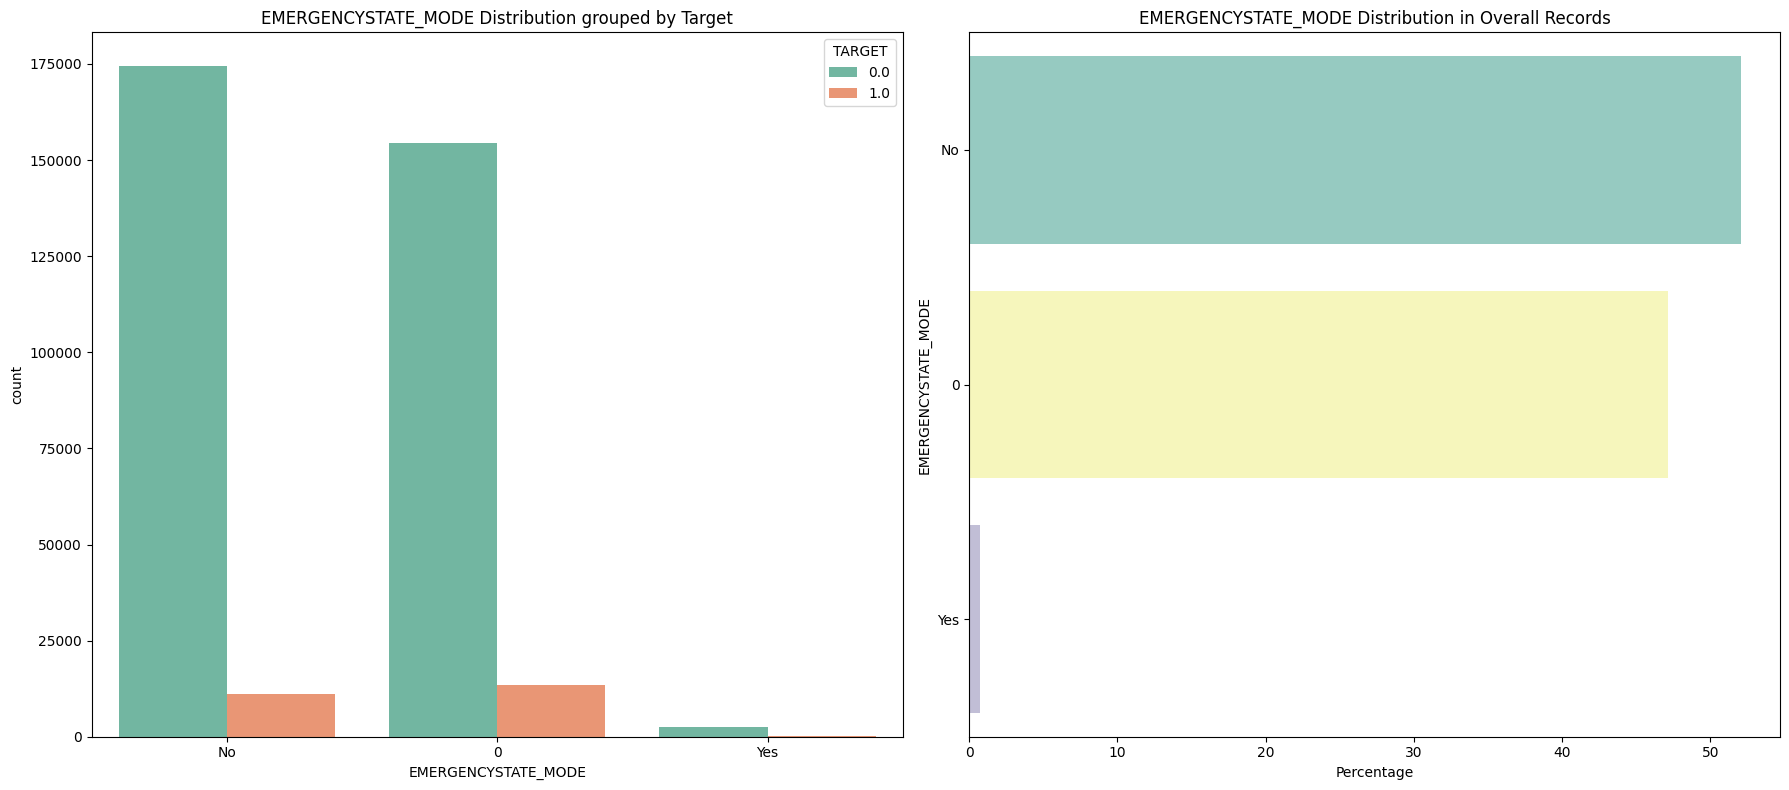

In [62]:

previous_data=df3
previous_data.head

previous_data.columns
previous_data.index # The inde is SH_ID_PREV

current_data.columns
current_data.index #SK_ID_CURR

#They have to be the same name
#Let´s rename previous data index name
previous_data.index.names = ["SK_ID_CURR"]

#Let us set the index, since both a column
previous_data.set_index =  ["SK_ID_CURR"]
current_data.set_index = ["SK_ID_CURR"]

#Since the SK_ID_CURR is also a column in Previous_data has to be droped

# Let's get the Target variable to previous application to see if we can find any relationship
previous_data.merge(current_data, left_on='SK_ID_CURR', right_on='SK_ID_CURR')
print(previous_data.shape)

##WE ARE GOING TO USE THE COLUMN THAT RECOMENDS APPROVAL AS ONG AS IT INSURED OMN APPROVAL
previous_data.rename({'NFLAG_INSURED_ON_APPROVAL':'TARGET'}, axis=1, inplace=True)
previous_data.info()

##Let us create a AMNT_DFF COLUN
previous_data['AMT_DIFF'] = previous_data['AMT_APPLICATION']-previous_data['AMT_CREDIT']
previous_data.head()


# =============================================================================
# # Seperating Numeric and Object columns names
# =============================================================================

# Seperating columns of object type (non nunmeric)
prev_obj_cols = list(previous_data.select_dtypes(include='object'))
print('data_obj_cols : ',len(data_obj_cols))
prev_obj_cols
print(prev_obj_cols)

# Seperating columns of nunmeric type
prev_numeric_cols = list(previous_data.select_dtypes(include=['float64','int64']))
print('data_numeric_cols : ',len(data_numeric_cols))
prev_numeric_cols

# Let's create a function to explore various features and how these are distributed for object columns
columns_data[(columns_data == 'previous_data')]


import seaborn as sns


def distributionGraphsPrevSeaborn(previous_data, x):
    print("\033[1m\033[1;3mDistribution Based on " + str(x) + "\033[0m")
    # Assuming 'columns_data' is defined elsewhere to describe column data.
    print('Description : ', 'Column description placeholder.')
    
    plt.figure(figsize=(18, 8))
    
    # Distribution grouped by TARGET
    plt.subplot(1, 2, 1)
    plt.title(str(x) + ' Distribution grouped by Target')
    sns.countplot(data=previous_data, x=x, hue='TARGET', palette='Set2')
    
    # Overall distribution
    plt.subplot(1, 2, 2)
    plt.title(str(x) + ' Distribution in Overall Records')
    overall_counts = previous_data[x].value_counts(normalize=True) * 100
    sns.barplot(x=overall_counts.values, y=overall_counts.index, palette='Set3')
    plt.xlabel('Percentage')
    
    plt.tight_layout()
    plt.show()

# Test the function with your newlist of columns
newlist = ['NAME_CONTRACT_TYPE', 'NAME_CASH_LOAN_PURPOSE']

# Assuming 'previous_data' is your DataFrame
for col in data_obj_cols:
    distributionGraphsPrevSeaborn(current_data, col)
